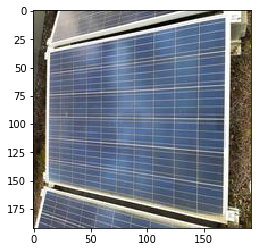

In [267]:
import rectification as rec
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import cv2
import numpy as np


panel = plt.imread(r'../data/Rathausen_192x192/20210312_110957.jpg')
mask = plt.imread(r'../data/test/Rathausen_192x192_mask/20210312_110957.jpg')
#mask = cv2.resize(mask, (1280,1280))
plt.imshow(panel)


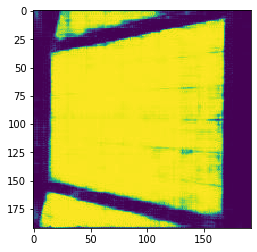

In [268]:
plt.imshow(mask)

In [269]:
img1 = cv2.cvtColor(panel, cv2.COLOR_BGR2GRAY)

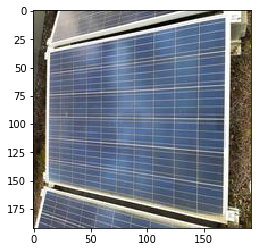

In [270]:
plt.imshow(panel)

In [271]:
#cv2.boundingRect(panel)

In [272]:
#edged = cv2.Canny(mask,100,500,False)

In [273]:
edged = cv2.Canny(mask,50,700,False)

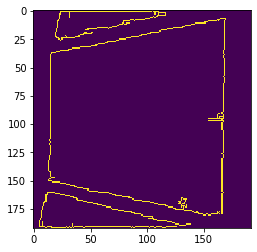

In [274]:
plt.imshow(edged)

In [275]:
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE   )

In [276]:
len(contours)

6

In [277]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 4,  0,  2, -1],
        [ 3, -1, -1,  1],
        [-1,  2, -1,  1],
        [-1,  1,  5, -1],
        [-1, -1, -1,  4]]], dtype=int32)

In [278]:
def get_largest_contour(contours):

    bigest_areas= 0
    bigest_cnt = []

    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)

    return all_areas


In [279]:
bigest_areas= 0
bigest_cnt = []



In [302]:
bigest_cnt

array([[[165,   7]],

       [[164,   8]],

       [[162,   8]],

       [[161,   9]],

       [[154,   9]],

       [[153,  10]],

       [[151,  10]],

       [[150,  11]],

       [[143,  11]],

       [[142,  12]],

       [[139,  12]],

       [[138,  13]],

       [[134,  13]],

       [[133,  14]],

       [[131,  14]],

       [[130,  15]],

       [[123,  15]],

       [[122,  16]],

       [[118,  16]],

       [[117,  17]],

       [[113,  17]],

       [[112,  18]],

       [[111,  18]],

       [[110,  19]],

       [[103,  19]],

       [[102,  20]],

       [[100,  20]],

       [[ 99,  21]],

       [[ 95,  21]],

       [[ 94,  22]],

       [[ 93,  22]],

       [[ 92,  23]],

       [[ 86,  23]],

       [[ 85,  24]],

       [[ 82,  24]],

       [[ 81,  25]],

       [[ 76,  25]],

       [[ 75,  26]],

       [[ 73,  26]],

       [[ 72,  27]],

       [[ 65,  27]],

       [[ 64,  28]],

       [[ 63,  28]],

       [[ 62,  29]],

       [[ 57,  29]],

       [[ 

In [280]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    print(area)
    if area > bigest_areas:
        bigest_areas = area
        bigest_cnt = cnt

14.5
53.5
18.0
4.0
32.5
10.0


In [281]:
area = cv2.contourArea(bigest_cnt)
area

53.5

In [282]:
#epsilon = 0.1*cv2.arcLength(cnt,True)
#approx = cv2.approxPolyDP(cnt,epsilon,True)

In [283]:
hull = cv2.convexHull(bigest_cnt)
#hull

In [284]:
#bigest_cnt

In [285]:
black = np.zeros_like(img1)


In [286]:
img2 = img1.copy()
black2 = black.copy()

In [287]:
cv2.drawContours(black2, [hull], -5, (255, 255, 255), -1)
cv2.drawContours(black2, [hull], -5, (255, 255, 255), 10)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

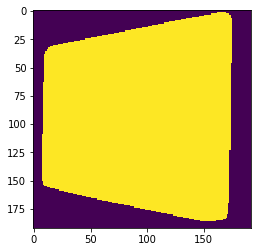

In [288]:
plt.imshow(black2)

In [289]:
x,y,w,h = cv2.boundingRect(hull)

In [290]:
masked = cv2.bitwise_and(panel, panel, mask = black2) 

In [291]:
crop = masked[y:y+h,x:x+w]

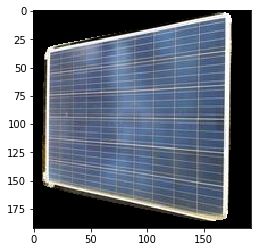

In [292]:
plt.imshow(masked)

In [293]:
panel_crop = cv2.resize(masked,(192,192))

In [294]:
edgelets1 = rec.compute_edgelets(panel_crop)

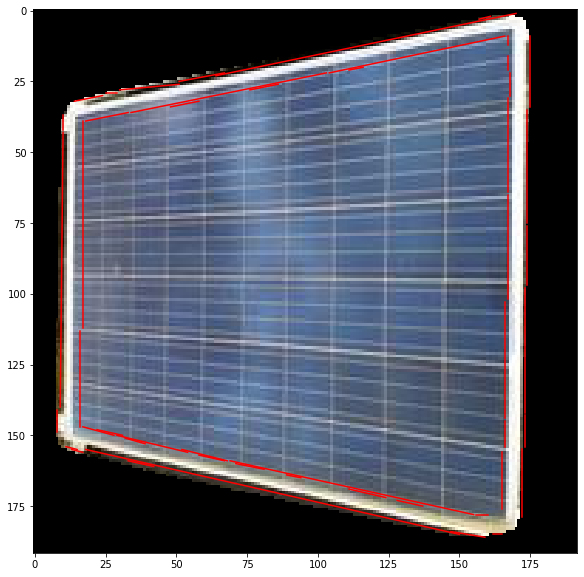

In [295]:
rec.vis_edgelets(panel_crop, edgelets1) # Visualize the edgelets

C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:121: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.abs(cosine_theta))
C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:297: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  est_model = np.linalg.lstsq(a, b)[0]


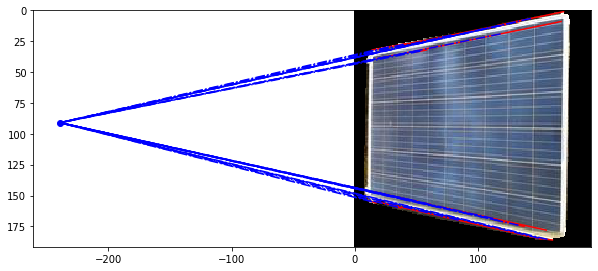

In [296]:
vp1 = rec.ransac_vanishing_point(edgelets1, num_ransac_iter=2000, 
                             threshold_inlier=5)
vp1 = rec.reestimate_model(vp1, edgelets1, threshold_reestimate=5)
rec.vis_model(panel_crop, vp1) # Visualize the vanishing point model

C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:121: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.abs(cosine_theta))
C:\Users\ckw-haec\code\photovoltaic_images\notebooks\rectification.py:297: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  est_model = np.linalg.lstsq(a, b)[0]


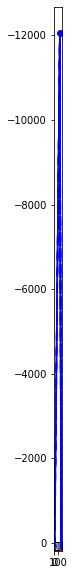

In [297]:
edgelets2 = rec.remove_inliers(vp1, edgelets1, 10)
vp2 = rec.ransac_vanishing_point(edgelets2, num_ransac_iter=2000,
                             threshold_inlier=5)
vp2 = rec.reestimate_model(vp2, edgelets2, threshold_reestimate=5)
rec.vis_model(panel_crop, vp2) # Visualize the vanishing point model

In [298]:
warped_img = rec.compute_homography_and_warp(panel_crop, vp1, vp2)
warped_img.shape

(188, 113, 3)

In [299]:
img = cv2.resize(warped_img, (192,192))

In [300]:
def crop(image):
    y_nonzero, x_nonzero, _ = np.nonzero(image)
    return image[np.min(y_nonzero):np.max(y_nonzero), np.min(x_nonzero):np.max(x_nonzero)]

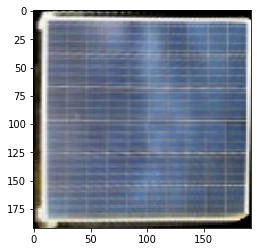

In [301]:
plt.imshow(cv2.resize(crop(warped_img), (192, 192)))